In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn import metrics
from scipy.stats import zscore
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split



path =  "/Users/eduard.hogea/Documents/Facultate/Internship/explorare/KNN99---LTN/datesets/KDD99/kddcup99.csv"
df = pd.read_csv(path)
df.drop_duplicates(keep='first', inplace = True)
df.dropna(inplace=True,axis=1) 
print("Read {} rows.".format(len(df)))

Read 145585 rows.


In [2]:
# changing attack labels to their respective attack class
def change_label(df):
    df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
    df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [3]:
change_label(df)

In [4]:
counts = df.label.value_counts()
counts = counts.array

## Data Normalization

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# selecting numeric attributes columns from data
numeric_col = df.select_dtypes(include='number').columns

In [6]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

In [7]:
# data before normalization
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [8]:
# calling the normalization() function
df = normalization(df.copy(),numeric_col)

In [9]:
# data after normalization
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.107851,tcp,http,SF,-0.004293,0.042595,-0.011722,-0.084394,-0.004737,-0.07021,...,-1.054233,0.979265,-0.417557,0.071227,-0.315311,-0.644431,-0.641708,-0.360879,-0.353942,normal
1,-0.107851,tcp,http,SF,-0.004261,-0.039036,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.967059,0.979265,-0.417557,-0.177609,-0.315311,-0.644431,-0.641708,-0.360879,-0.353942,normal
2,-0.107851,tcp,http,SF,-0.004263,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.879886,0.979265,-0.417557,-0.260554,-0.315311,-0.644431,-0.641708,-0.360879,-0.353942,normal
3,-0.107851,tcp,http,SF,-0.004272,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.792713,0.979265,-0.417557,-0.260554,-0.315311,-0.644431,-0.641708,-0.360879,-0.353942,normal
4,-0.107851,tcp,http,SF,-0.004273,-0.013613,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.705540,0.979265,-0.417557,-0.302026,-0.315311,-0.644431,-0.641708,-0.360879,-0.353942,normal


## Categorical data One-hot encoding

In [10]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [11]:
# creating a dataframe with only categorical attributes
categorical = df[cat_col]

In [12]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Multi-Class Classification encoding

In [13]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = df.copy()
multi_label = pd.DataFrame(multi_data.label)

In [14]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [15]:
le2.classes_

array(['Dos', 'Probe', 'R2L', 'U2R', 'normal'], dtype=object)

In [16]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data
#print(len(multi_data[(multi_data['label'] == "Dos")])) #2131

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.107851,tcp,http,SF,-0.004293,0.042595,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.641708,-0.360879,-0.353942,4,0,0,0,0,1,normal
1,-0.107851,tcp,http,SF,-0.004261,-0.039036,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.641708,-0.360879,-0.353942,4,0,0,0,0,1,normal
2,-0.107851,tcp,http,SF,-0.004263,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.641708,-0.360879,-0.353942,4,0,0,0,0,1,normal
3,-0.107851,tcp,http,SF,-0.004272,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.641708,-0.360879,-0.353942,4,0,0,0,0,1,normal
4,-0.107851,tcp,http,SF,-0.004273,-0.013613,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.641708,-0.360879,-0.353942,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,-0.107851,tcp,http,SF,-0.004222,-0.016096,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.619655,-0.360879,-0.353942,4,0,0,0,0,1,normal
494016,-0.107851,tcp,http,SF,-0.004237,-0.009436,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.619655,-0.360879,-0.353942,4,0,0,0,0,1,normal
494017,-0.107851,tcp,http,SF,-0.004281,-0.027295,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.619655,-0.360879,-0.353942,4,0,0,0,0,1,normal
494018,-0.107851,tcp,http,SF,-0.004232,-0.027295,-0.011722,-0.084394,-0.004737,-0.07021,...,-0.619655,-0.360879,-0.353942,4,0,0,0,0,1,normal


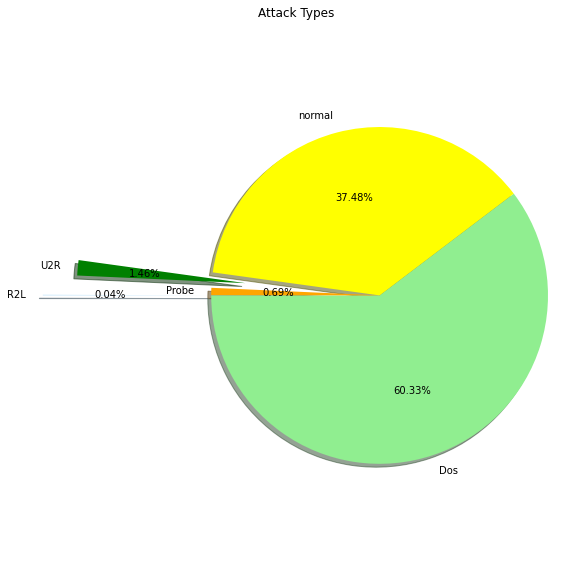

In [17]:

import matplotlib.pyplot as plt

labels= ['Dos', 'normal', 'U2R', 'Probe', 'R2L']

colors=['lightgreen', 'yellow', 'green', 'orange', 'lightskyblue']

x= counts
explode = [0, 0, 0.8, 0, 1]
fig, ax = plt.subplots()
ax.pie(x, labels = labels,
          colors = colors,
          autopct='%.2f%%',
          explode = explode,
          shadow = True,
          startangle = 180)
fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
plt.title('Attack Types')
#plt.savefig('Pie_chart_multi.png')
plt.axis('equal')

plt.show()

## Feature extraction

In [18]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

/var/folders/9m/k3vyv4317cz56g6f681k4jnm0000gn/T/ipykernel_88644/2873760033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_data['intrusion']


In [19]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

dst_host_count              0.536262
logged_in                   0.751535
dst_host_srv_count          0.789684
srv_serror_rate             0.805420
dst_host_srv_serror_rate    0.806182
dst_host_serror_rate        0.806861
serror_rate                 0.807267
count                       0.814498
dst_host_same_srv_rate      0.820619
same_srv_rate               0.928824
intrusion                   1.000000
Name: intrusion, dtype: float64

In [20]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [21]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [22]:
# saving final dataset to disk
multi_data.to_csv('multi_data.csv')

# final dataset for multi-class classification
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.661639,1.017175,-0.642802,-0.643364,-0.644431,0.979265,-0.641708,-1.054233,0.771739,0,...,0,1,0,4,0,0,0,0,1,normal
1,-0.661639,1.017175,-0.642802,-0.643364,-0.644431,0.979265,-0.641708,-0.967059,0.771739,0,...,0,1,0,4,0,0,0,0,1,normal
2,-0.661639,1.017175,-0.642802,-0.643364,-0.644431,0.979265,-0.641708,-0.879886,0.771739,0,...,0,1,0,4,0,0,0,0,1,normal
3,-0.681573,1.017175,-0.642802,-0.643364,-0.644431,0.979265,-0.641708,-0.792713,0.771739,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.681573,1.017175,-0.642802,-0.643364,-0.644431,0.979265,-0.641708,-0.705540,0.771739,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,-0.701506,1.017175,-0.642802,-0.643364,-0.644431,0.979265,-0.619655,1.090225,0.771739,0,...,0,1,0,4,0,0,0,0,1,normal
494016,-0.681573,1.017175,-0.642802,-0.643364,-0.644431,0.979265,-0.619655,1.090225,0.771739,0,...,0,1,0,4,0,0,0,0,1,normal
494017,-0.681573,1.017175,-0.400279,-0.268007,-0.511832,0.979265,-0.619655,1.090225,0.771739,0,...,0,1,0,4,0,0,0,0,1,normal
494018,-0.681573,1.017175,-0.642802,-0.643364,-0.556032,0.979265,-0.619655,1.090225,0.771739,0,...,0,1,0,4,0,0,0,0,1,normal


## Multi-class classification

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

X = multi_data.iloc[:,0:89]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal', 'Probe', 'R2L', 'U2R']] # target attributes

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [24]:
model = Sequential() # initializing model
# input layer and first layer with 50 neurons
model.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))

#first hidden
model.add(Dense(units=16, input_dim=X_train.shape[1], activation='relu'))


#second hidden
model.add(Dense(units=16, input_dim=X_train.shape[1], activation='relu'))


#third hidden
model.add(Dense(units=8, input_dim=X_train.shape[1], activation='relu'))

# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))

# defining loss function, optimizer, metrics and then compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# training the model on training dataset
history = model.fit(X_train, y_train, epochs=60, batch_size=5000,validation_split=0.2)

# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

2022-05-05 15:31:36.290726: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-05 15:31:36.290813: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-05-05 15:31:36.442495: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1
Epoch 1/60
 1/18 [>.............................] - ETA: 4s - loss: 1.6575 - accuracy: 0.0054

2022-05-05 15:31:36.584921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 22ms/step - loss: 1.5565 - accuracy: 0.2677 - val_loss: 1.4735 - val_accuracy: 0.5296
Epoch 2/60
 6/18 [=========>....................] - ETA: 0s - loss: 1.4490 - accuracy: 0.5547

2022-05-05 15:31:37.037360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 14ms/step - loss: 1.3801 - accuracy: 0.5795 - val_loss: 1.2445 - val_accuracy: 0.5977
Epoch 3/60
18/18 [==============================] - 0s 15ms/step - loss: 1.0721 - accuracy: 0.6026 - val_loss: 0.8573 - val_accuracy: 0.5998
Epoch 4/60
18/18 [==============================] - 0s 14ms/step - loss: 0.6886 - accuracy: 0.6037 - val_loss: 0.5534 - val_accuracy: 0.6007
Epoch 5/60
18/18 [==============================] - 0s 14ms/step - loss: 0.4685 - accuracy: 0.7936 - val_loss: 0.3900 - val_accuracy: 0.9576
Epoch 6/60
18/18 [==============================] - 0s 14ms/step - loss: 0.2871 - accuracy: 0.9617 - val_loss: 0.2081 - val_accuracy: 0.9611
Epoch 7/60
18/18 [==============================] - 0s 15ms/step - loss: 0.1713 - accuracy: 0.9628 - val_loss: 0.1579 - val_accuracy: 0.9617
Epoch 8/60
18/18 [==============================] - 0s 14ms/step - loss: 0.1410 - accuracy: 0.9662 - val_loss: 0.1378 - val_accuracy: 0.9689
Epoch 9/60
18/18 [======

In [25]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [26]:
def confusion_matrix_func(y_test, y_test_pred):
    
    '''
    This function computes the confusion matrix using Predicted and Actual values and plots a confusion matrix heatmap
    '''
    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['Dos','normal' ,'Probe', 'R2L', 'U2R']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
print('Predicting on the test data:')
escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.values,axis=1)

vscore = metrics.accuracy_score(y_eval, pred)

rscore = recall_score(y_eval, pred, average='weighted')

ascore = precision_score(y_eval, pred, average='weighted')

f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)


print('Completed')
print("Validation score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(f1score))
print('='*50)
#print("ROC-AUC score: {}".format(roc_auc_socre))

Predicting on the test data:
1138/1138 [==============================] - 6s 5ms/step - loss: 0.0401 - accuracy: 0.9887


2022-05-05 15:32:04.285668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Completed
Validation score: 0.9886529109541995
Evaluation score: [0.04014406353235245, 0.9886529445648193]
Recall score: 0.9886529109541995
Precision score: 0.988440667055527
F1 score: 0.9884958444560128


/Users/eduard.hogea/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


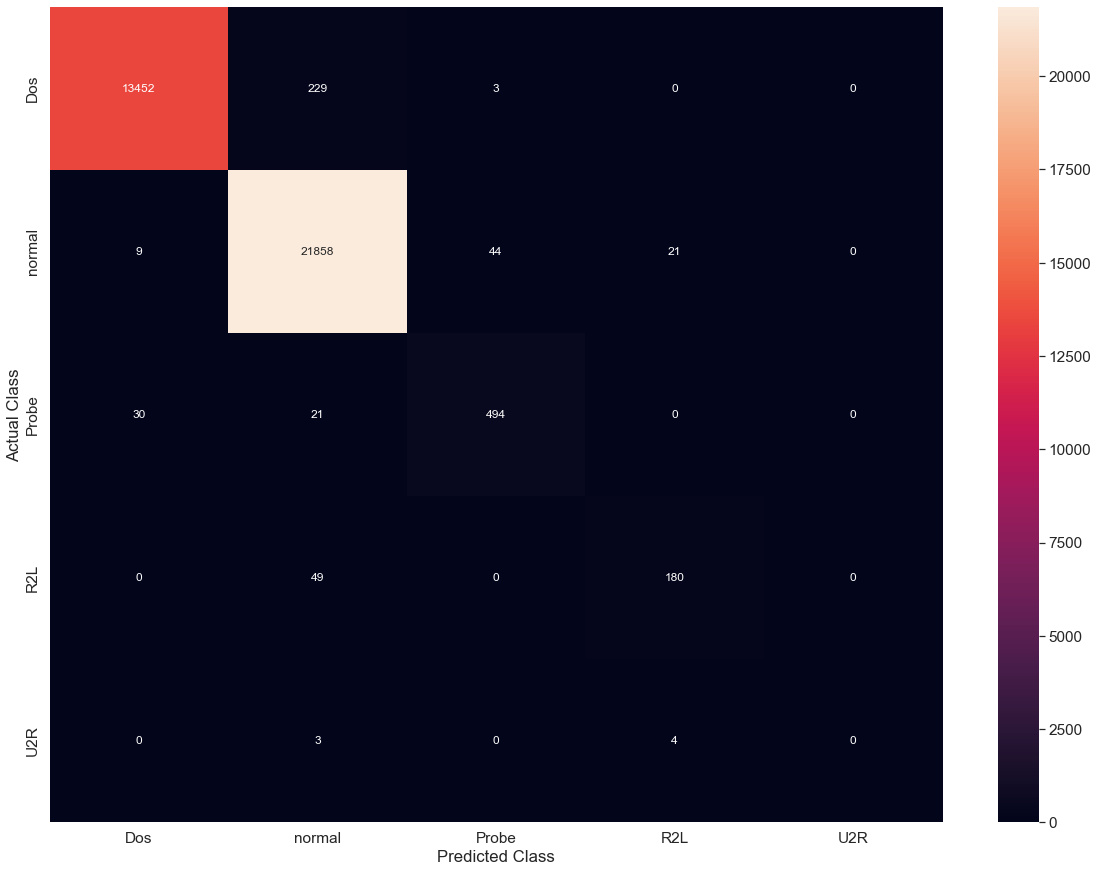

In [28]:
confusion_matrix_func(y_eval, pred)

Text(19.125, 0.5, 'Loss')

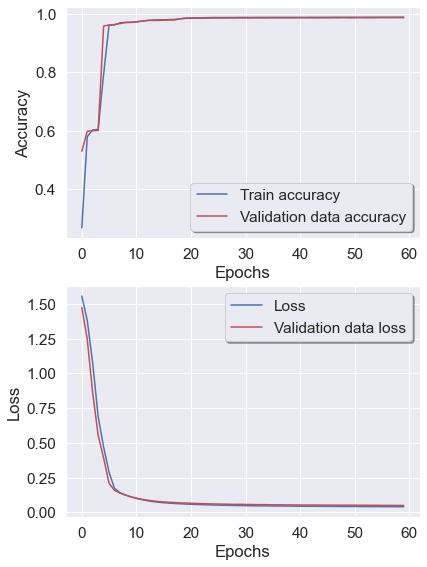

<Figure size 1500x900 with 0 Axes>

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8

results = pd.read_csv("history.csv", skipinitialspace = True)
fig, ax = plt.subplots(2,1)
fig.tight_layout()
figure(figsize=(10, 6), dpi=150)
ax[0].plot(results['accuracy'], color='b', label="Train accuracy")
ax[0].plot(results['val_accuracy'], color='r', label="Validation data accuracy",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(results['loss'], color='b', label="Loss")
ax[1].plot(results['val_loss'], color='r',label="Validation data loss")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
